# Lab 6: Black Body Radiation and Stefan-Boltzmann Law

Physics 202

Shreya Parjan + Alex G.

10/22/18

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import math as m
%matplotlib inline
import scipy.interpolate

In [3]:
#calculate array of resistances
data = np.loadtxt('TungstenExperimental.txt')
V = data[:,0] #volts
I = data[:,1] #amps
R = V/I
print("The array of experimentally determined resistances is: ")
print(R)

#determine temps of tungsten filaments
data = np.loadtxt('Tungsten.txt')
rho = data[:,0] #rho
t = data[:,1] #kelvin
#our equation is R/Rmin = rho/rho[0]
rhoMin = data[0,0]
rhoNorm = rho/rhoMin
Rnorm = R/R.min()

from scipy.interpolate import interp1d #interpolate in 1 dimension
func = interp1d(rhoNorm, t, kind = 'cubic')
interpolatedTemps = func(Rnorm)
print("The interpolated temps are: ")
print(interpolatedTemps)

#find power radiated by tungsten filament (equation: P = IV)
P = I*V #watts
print("The power radiated by the filament is: ")
print(P)

The array of experimentally determined resistances is: 
[ 8.62068966  7.92079208  8.20895522  9.52380952 10.71428571 10.89108911
 11.25541126 12.15686275 13.18681319 13.88888889 15.         12.78772379
 13.59223301 14.21911422 14.86486486 15.40130152 15.96638655 16.56565657
 17.02544031 17.58034026 18.16513761 18.24817518 20.66772655 22.56699577
 24.42159383 26.12826603 27.59381898 28.92561983 30.42198234 31.71641791
 32.88888889 34.04255319 36.86635945 39.52011291 41.85742315 44.14469651
 46.2962963  48.298573   50.23547881 52.05205205 53.82027871 55.50416281
 57.21949039 58.84898312 60.42803189 61.70300288 62.52570958 65.07413509
 66.44655386 67.82464847 69.29460581 70.83333333 72.96499367 75.43934848]
The interpolated temps are: 
[ 320.88051078  300.          308.60343716  347.72431877  382.86267211
  388.05138299  398.71523394  424.92099995  454.49902578  474.40448887
  505.41994731  443.08816063  466.02086477  483.68758155  501.68201903
  516.46254251  531.86506934  548.01061563  

y-intercept =  249.4350536493489
slope =  169.2056220126674


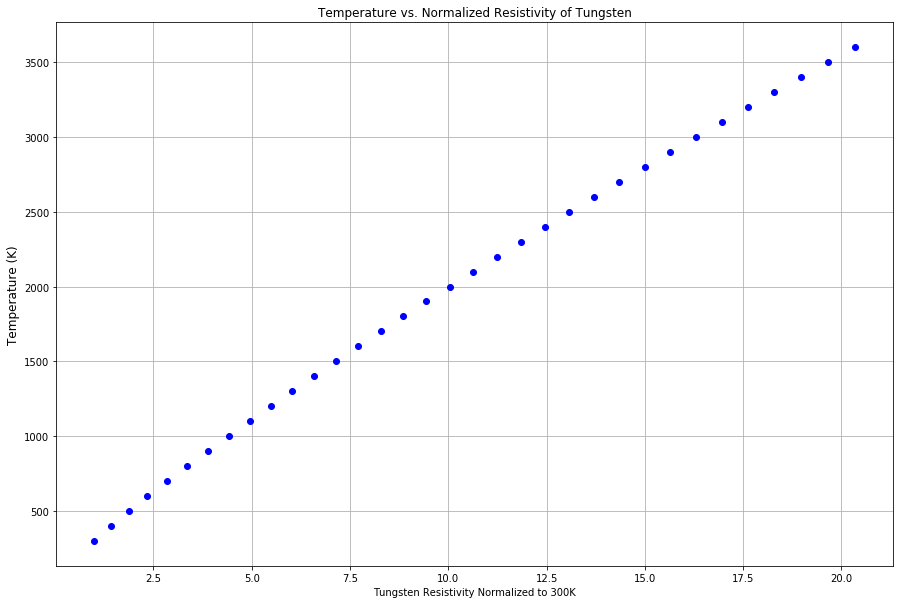

In [4]:
#REPLICATION OF GRAPH FROM HANDOUT FIGURE 1
fig = plt.figure(figsize=(15,10))
plt.grid(True)
def straight_line_model(x, A, B):
    return A + B * x

popt, pcov = scipy.optimize.curve_fit(straight_line_model, rhoNorm, t)
yIntercept = popt[0]
slope = popt[1]
print('y-intercept = ',yIntercept)
print('slope = ',slope)

rhoNorm_for_plot = np.linspace(rhoNorm.min(), rhoNorm.max(), 50)
best_fit_line = straight_line_model(rhoNorm_for_plot, popt[0], popt[1])

#calculates uncertainties for both variables
popt_uncertainties = np.sqrt(np.diag(pcov)) # get the diagonal elements then take sqrt

plt.plot(rhoNorm, t, 'bo') #without '-' after bo, plots points alone

plt.xlabel('Tungsten Resistivity Normalized to 300K') # label the x-axis
plt.ylabel('Temperature (K)', size=12) # label the y-axis

plt.title('Temperature vs. Normalized Resistivity of Tungsten') # title
plt.show()

Text(0,0.5,'Log of pPower (W)')

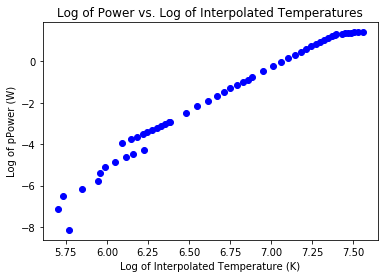

In [5]:
plt.plot(np.log(interpolatedTemps), np.log(P), 'bo')
plt.title ('Log of Power vs. Log of Interpolated Temperatures')
plt.xlabel ('Log of Interpolated Temperature (K)')
plt.ylabel ('Log of pPower (W)')

y-intercept =  -29.389922546348007
slope =  4.157435710706198
[0.10226572 0.01511838]


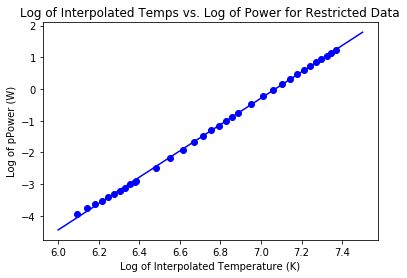

In [6]:
popt, pcov = scipy.optimize.curve_fit(straight_line_model, (np.log(interpolatedTemps))[11:45], (np.log(P))[11:45])
yIntercept2 = popt[0]
slope2 = popt[1]
print('y-intercept = ',yIntercept2)
print('slope = ',slope2)

lntemps_for_plot = np.linspace(6, 7.5, 50)
best_fit_line = straight_line_model(lntemps_for_plot, popt[0], popt[1])

plt.plot((np.log(interpolatedTemps))[11:45], (np.log(P))[11:45], 'bo')
plt.plot(lntemps_for_plot, best_fit_line, 'b')
plt.title ('Log of Interpolated Temps vs. Log of Power for Restricted Data')
plt.xlabel ('Log of Interpolated Temperature (K)')
plt.ylabel ('Log of pPower (W)')
popt_uncertainties2 = np.sqrt(np.diag(pcov))
print(popt_uncertainties2)

The slope is 4.16 +/- 0.02 which is slightly off from the expected value of 4.

## Part 2

In [7]:
D = np.array([0.264, 0.138, 0.231, 0.215,0.139,0.153,0.152, 0.147])
D = D*0.001
d = np.array([.021,.052,.029,.048,0.021,.048, .021,.017,.025])
d = d*0.001
N = np.array([60,61,65,57,52,58,63,57])

meanN = np.mean(D)
meand = np.mean(d)
meanD = np.mean(N)

print ('Mean of D', meanD)
print ('Mean of d', meand)
print ('Mean of N', meanN)

Mean of D 59.125
Mean of d 3.1333333333333334e-05
Mean of N 0.00017987500000000002


In [8]:
SA = meanD*meand*meanN*(np.pi**2)
print('surface area = ', SA)

surface area =  3.2888820985317563e-06


In [10]:
sigma = 5.67e-8 #W/m2K4
E = np.exp(popt[0])/(sigma*SA)
print("emissivity = ", E," which is between 0 and 1, as it should be")

emissivity =  0.9236074996390992  which is significantly smaller than the accepted value but is still between 0 and 1


## Part 3

At low temps:

1. By the Stefan Boltzmann law, the black body's temperature should be low because a low power is radiated and temperature and power are directly proportional.

2. The temperature should equal room temp without any power. The equation should be modified to include a change in temperature from room temperature variable, delta T, in place of just temperature so that delta T = 0 when power is 0. Similarly, the power should be modified to a delta power because the filament radiates power even at room temperature.

3. Heat loss due to conduction means that power is also being conducted away. This would result in falsely inflated interpolated temperatures. The values for epsilon would thus be higher than expected.

4. Heat loss due to conduction has more of an impact at lower temperatures when the filament is not completely heated. Because the filmament heats up from the middle, it conducts at the middle more than it radiates so loss due to conduction has more of an impact.


At high temps:

1. Because the area of the filament decreases at higher temperatures, the temperature would need to increase to satisfy our equation. The power levels off as the filament disintegrates, according to our results. Power is near constant because resistance and voltage increase while current decreases. This results in low values of power, as evidenced by the graph.

2. We assumed that the length/area of the filament are unchanged at higher temperatures but we know that the area decreases as the filament breaks down at higher temperatures, so we cannot neglect the change in dimension of the filament. 